Este ejercicio de clasificacion multiple tenemos un dataset de noticias(entradas), que tiene 46 topicos(salidas)

In [1]:
import numpy as np
from keras import models, layers
from keras.datasets import reuters

In [2]:
(train_data, train_labels),(test_data, test_labels)= reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 1us/step


In [ ]:
word_index=reuters.get_word_index() 
word_index=dict([(value,key) for (key,value) in word_index.items()])
for _ in train_data[0]:
  print(word_index.get(_ -3))


In [4]:
def vectorizar(sequences, dim=10000):
  results=np.zeros((len(sequences),dim))
  for i, sequences in enumerate(sequences):
    results[i,sequences]=1
  return results

In [5]:
x_train=vectorizar(train_data)
x_test=vectorizar(test_data)

Pasamos las salidas o los labels a un one hot encoding ubicando cada salida en una posicion entre las 46 opciones.

In [6]:
from keras.utils import to_categorical

In [7]:
y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)

Construimos el modelo de nuestra red:

In [18]:
model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Compilamos el modelo:

In [19]:
model.compile(optimizer='rmsprop', #existen otro como el adam
              loss='categorical_crossentropy', #lo que en clasificacion binaria es el binary_crossentropy
              metrics=['accuracy'])

Separamos el set de validacion:

In [20]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=y_train[:1000]
partial_y_train=y_train[1000:]


<h1>Entrenamiento del modelo de clasificacion</h1>

In [21]:
history = model.fit(partial_x_train, partial_y_train, 
                   epochs=9, 
                   batch_size=512, 
                   validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 33ms/step - loss: 2.7739 - accuracy: 0.5084 - val_loss: 1.8718 - val_accuracy: 0.6090
Epoch 2/9
16/16 [==============================] - 0s 17ms/step - loss: 1.5647 - accuracy: 0.6784 - val_loss: 1.3709 - val_accuracy: 0.6820
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.1801 - accuracy: 0.7444 - val_loss: 1.1888 - val_accuracy: 0.7210
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.9618 - accuracy: 0.7915 - val_loss: 1.0658 - val_accuracy: 0.7620
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.7957 - accuracy: 0.8265 - val_loss: 0.9897 - val_accuracy: 0.7860
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 0.6660 - accuracy: 0.8524 - val_loss: 0.9949 - val_accuracy: 0.7820
Epoch 7/9
16/16 [==============================] - 0s 18ms/step - loss: 0.5602 - accuracy: 0.8772 - val_loss: 0.9389 - val_accuracy: 0.7830
Epoch 8/9
16/16 [===

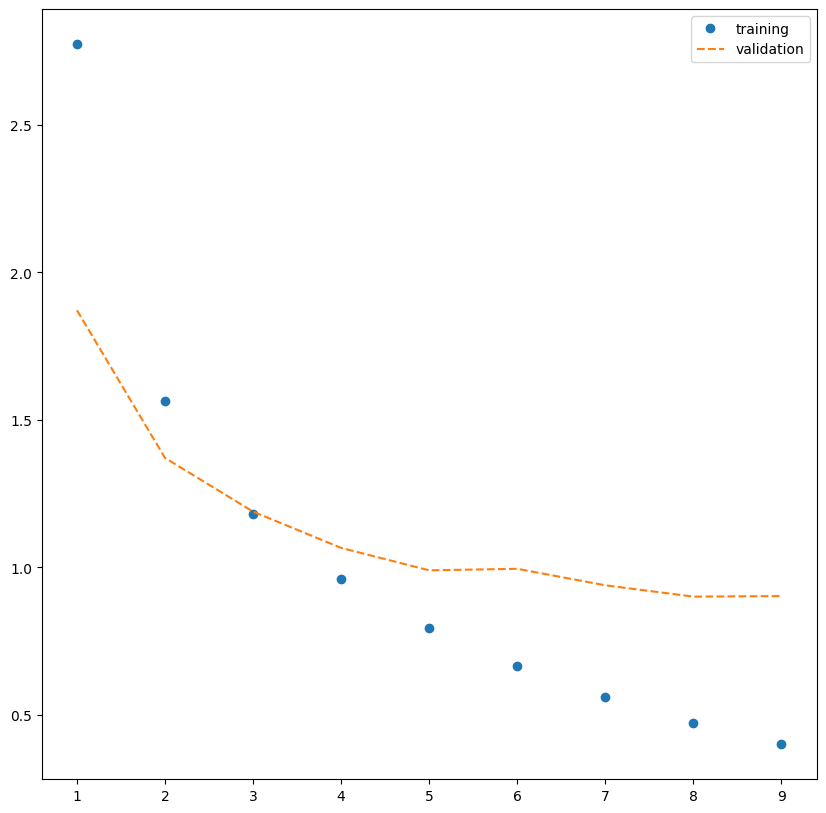

In [22]:
#Grafiquemos
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

fig=plt.figure(figsize=(10,10))
epoch=range(1,len(loss_values)+1)
plt.plot(epoch, loss_values, 'o', label='training')
plt.plot(epoch, val_loss_values, '--', label='validation')
plt.legend()
plt.show()

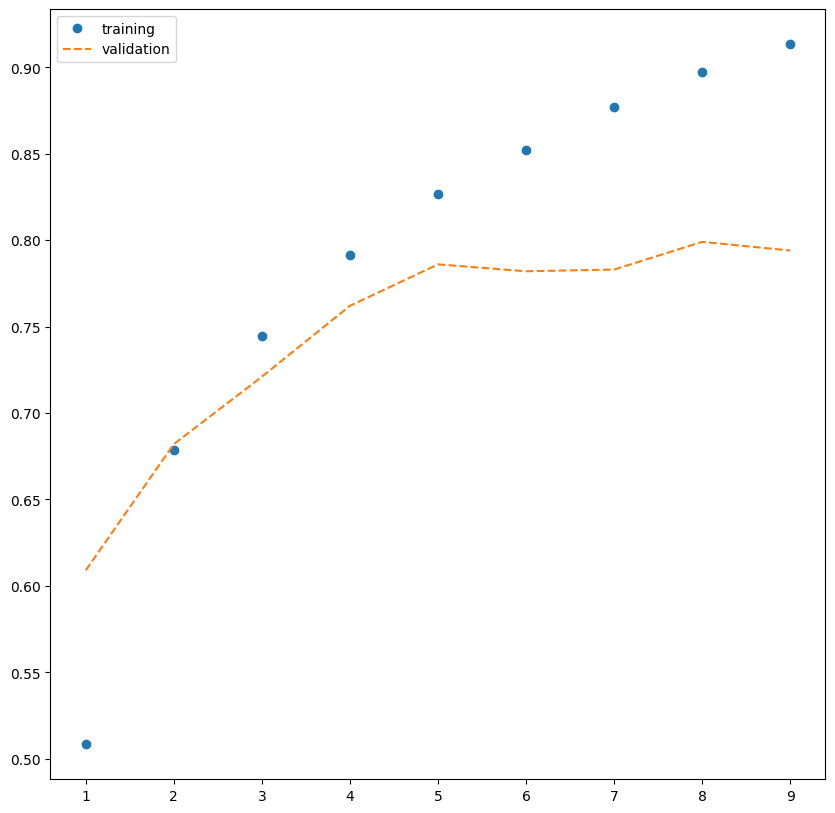

In [23]:
history_dict=history.history
loss_values=history_dict['accuracy']
val_loss_values=history_dict['val_accuracy']

fig=plt.figure(figsize=(10,10))
epoch=range(1,len(loss_values)+1)
plt.plot(epoch, loss_values, 'o', label='training')
plt.plot(epoch, val_loss_values, '--', label='validation')
plt.legend()
plt.show()

In [14]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.1861 - accuracy: 0.7801


[1.186076283454895, 0.780053436756134]

In [24]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9881 - accuracy: 0.7756


[0.9880726337432861, 0.7756010890007019]

In [25]:
predictions=model.predict(x_test) # de esta forma hacemos las predicciones

71/71 [==============================] - 0s 3ms/step


In [26]:
predictions[0]

array([1.86467587e-05, 5.69381373e-05, 2.09519112e-06, 8.11969101e-01,
       1.82707682e-01, 3.02202261e-06, 4.60181800e-05, 2.34208957e-04,
       7.16487353e-04, 4.06901381e-05, 3.72605100e-05, 3.78430210e-04,
       6.73781105e-05, 1.11719128e-04, 1.00876750e-05, 1.35487644e-05,
       1.21304096e-04, 1.33406065e-05, 1.43190914e-06, 3.54326272e-04,
       2.28697923e-03, 8.03036091e-05, 2.72772724e-07, 1.04251238e-04,
       1.28928623e-05, 3.23300083e-05, 2.99886256e-06, 3.14932295e-05,
       2.06310375e-04, 1.33334834e-05, 1.08644599e-05, 5.61114939e-05,
       1.93907817e-05, 2.56720659e-06, 6.34549906e-06, 1.43617954e-05,
       5.63900721e-05, 9.84950384e-06, 1.43060506e-05, 6.77910721e-05,
       2.48941706e-05, 1.58496084e-06, 2.03248419e-06, 2.38434259e-05,
       1.30081289e-05, 1.75346167e-06], dtype=float32)

In [28]:
np.sum(predictions[0])

1.0

In [29]:
np.argmax(predictions[0])

3

RETO: Aplicar todas las tecnicas para reducir el overfitting, un modelo mas pequeño, regularizacion y dropout, ademas de ajustar las epocas para que no iteremas o menos de lo que necesitamos (guiandose con las graficas)